In [1]:
import os

In [2]:
os.chdir('..')

In [58]:
import torch
import copy
import itertools
import pandas as pd
import numpy as np
from pathlib import Path

import mmcv
from mmcv import ProgressBar
from mmcv.parallel import collate, scatter

from mmcls.datasets.pipelines import Compose
from mmcls.apis import init_model, show_result_pyplot
from mmcls.apis import inference_model, init_model, show_result_pyplot

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [60]:
img = 'Img file'
config = 'Config file'
checkpoint = 'chkpt file'
device = 'cuda:0'

In [61]:
test_res = mmcv.load('logs/csaw_seq_swin/test.json')
target_file = pd.read_csv('/home/xumingjie/Desktop/CSAW_SEQ/seq_lv_val_set_.csv')
n_classes = 4
lw = 2

In [62]:
y_score = np.array(test_res['class_scores'])

In [63]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

In [65]:
labels = target_file['rad_time'].to_list()
for idx, label in enumerate(labels):
    rad_time = label.split('/')[2]
    labels[idx] = int(float(rad_time))-1

In [66]:
y_test = one_hot(np.array(labels), n_classes).astype(np.int32)

In [82]:
f1_score(np.argmax(y_test,axis=-1), np.argmax(y_score,axis=-1),average='macro')

0.4901612903225806

In [67]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

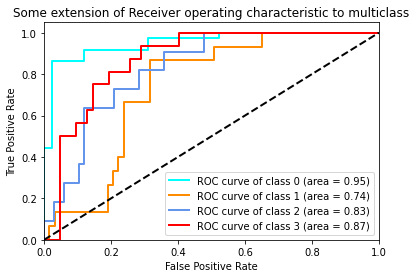

In [70]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

colors = cycle(["aqua", "darkorange", "cornflowerblue","red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for ")
plt.legend(loc="lower right")
plt.show()